# **Project Name**    -  **Book Recommendation System**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**Vaibhav Kumar Gupta
##### **Team Member 2 -**Bhavik Verma
##### **Team Member 3 -**Priyanka Pal
##### **Team Member 4 -**Dil Khush Sharma
##### **Team Member 5 -**Shayan Somanna

# **Project Summary -**

* This project is all about recomendation system.In this project we have tried to use some approches for recomending the books to the readers or users .We have used various ways such as collaborative Filtering and Content based Filtering for recomendation of the books to the users .

**ABOUT THE DATASET :** We have three diffrent datsets namely book.csv which contains information about the books such as book-author , publisher , book title , year of publication, image links and unique Book ID i.e ISBN Number .Then we have ratings.csv which contain information about ratings given by the users for the books, it contains user ID ,ISBN number and book rating (scale between 1-10). Then we have users.csv which contain information about users such as their location , age and their user ID 

**EDA :** For the EDA part we have analysed about the top Books rated by the users , top authors who got most ratings , top authors on the basis of number of books , Top publishers who have published maximum number of books, we have analysed the users age and lastly we have analysed their ratings we got that most of the users have rated 8.

**Recomendation Approaches :**

*  Collaborative Filtering

   In Collaborative Filtering we make predictions of the taste or the intrests of the user based based on the other similar users behaviour (which is called collaborative) .The simple understanding is that if a person P1 have similar opinion with person P2 , then if person P1 is reading Harry Potter books then person P2 may also read Harry Potter books

   Collaborative Filtering has mainly two implimentaion strategies
   *   Model Based
   *   Memory Based

We have used the following approaches

   Memory based
   *  User_based Collaborative Filtering 

      *In this technique we try to predict on basis of what user may like based on the ratings that they had given to the items. In simpe words here we try to indentify the neghbouring users on the basis of similarity of active users and then scoring of the items  is calculated on the basis of those neighbour users* 
   *  Item_based Collaborative Filtering

      *In Item based collaborative filtering we try to find similar items based on the items whichs user has liked or interacted with .It suggests an item based on items the user has previously consumed. It looks for the items the user has consumed then it finds other items similar to consumed items and recommends accordingly*


   Model based Collaborative Filtering Approach
   * Singular value decomposition(SVD)

     *It is a popular method in field of Data Science and Machine Learning .It is a classical method from the Linear Algebra concept. It is popular beacuse of its properties and its use in Recomendation System. We can use this in recomending Books, movies etc.*

     *SVD is a method from linear algebra that has been generally used as a dimensionality reduction technique in ML problems. It is amtrix Factorisation technique which tries to reduce the number of feature or attributes by reducing the sapce dimension from N dimension to I dimension.SVD is used as a collaborative filtering technique in recomendation technique domain. It consist of a matrix structure where the rows define the users and columns defines the item.*


  * Non-Negetive Matrix Factorisation(NMF): 
  
    *Our goal in NMF is to approximate the users-item V matrix by the dot product of two arrays W and H. Dimensions of the arrays are defined by dimensions of V and number of components we set to the algorithm. If V has n rows and m columns and we want to decompose it to k components, then W has n rows, and k columns and H has k rows and m columns.This is actually matrix factorization part of the algorithm. The Non-negative part refers to V, W, and H — all the values have to be equal or greater than zero, i.e., non-negative*
   


**Content based Filtering :**
  
   It is type of recomendation system which depends upon the data which we get from the customers , based on the data a user profile is generated

# **GitHub Link -**

(https://github.com/vaibhav251999/Book_Recomendation_System/blob/main/Vaibhav_Book_Recommendation_System_Capstone_Project.ipynb)

# **Problem Statement**


### During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

### In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

For implimentation of SVD and NMF techniques we require Surprise library

In [8]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
# Import Libraries
# for dealing with regular expression techniques
import re
import requests
import random
#for NLP related tasks
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# basic libraries
import pandas as pd
import numpy as np


import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#for TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# for finding similarity
from sklearn.metrics.pairwise import cosine_similarity

import scipy
import math
import sklearn
#for removing stopwords
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
#for SVD model
from scipy.sparse.linalg import svds
# for plotting graphs
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import SVD, NMF
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

### Dataset Loading

In [10]:
# Load Dataset
# Import Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Load Dataset Vaibhav
path_book='/content/drive/MyDrive/book recomendtation/Books.csv'
df_books=pd.read_csv(path_book)

path_rating='/content/drive/MyDrive/book recomendtation/Ratings.csv'
df_ratings=pd.read_csv(path_rating)

path_users='/content/drive/MyDrive/book recomendtation/Users.csv'
df_users=pd.read_csv(path_users)

### Dataset First View

In [12]:
# Dataset First Look
df_books.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [13]:
df_ratings.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [14]:
df_users.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


### Dataset Rows & Columns count

In [15]:
# Dataset Rows & Columns count

print(f"Books has {df_books.shape[0]} rows and {df_books.shape[1]} columns " )
print(f"Rating has {df_ratings.shape[0]} rows and {df_ratings.shape[1]} columns " )
print(f"Users has {df_users.shape[0]} rows and {df_users.shape[1]} columns " )

Books has 271360 rows and 8 columns 
Rating has 1149780 rows and 3 columns 
Users has 278858 rows and 3 columns 


*  books have 271360 rows and 8 columns
*  ratings has 1149780 rows and 3 columns
*  Users has 278858 rows and 3 columns


### Dataset Information

In [16]:
# Dataset Info
df_books.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [17]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [18]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [19]:
# Dataset Duplicate Value Count
# Missing Values/Null Values Count
print("Duplicate Values in BOOKS" ,len(df_books[df_books.duplicated()]))
print("Duplicate Values in RATINGS ",len(df_ratings[df_ratings.duplicated()]))
print("Duplicate Values in USERS",len(df_users[df_users.duplicated()]))

Duplicate Values in BOOKS 0
Duplicate Values in RATINGS  0
Duplicate Values in USERS 0


#### Missing Values/Null Values

In [20]:
# Missing Values/Null Values Count
print("NULL Values in BOOKS" ,df_books.isnull().sum())
print("NULL Values in RATINGS ",df_ratings.isnull().sum())
print("NULL Values in USERS",df_users.isnull().sum())

NULL Values in BOOKS ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
NULL Values in RATINGS  User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
NULL Values in USERS User-ID          0
Location         0
Age         110762
dtype: int64


<Figure size 1000x600 with 0 Axes>

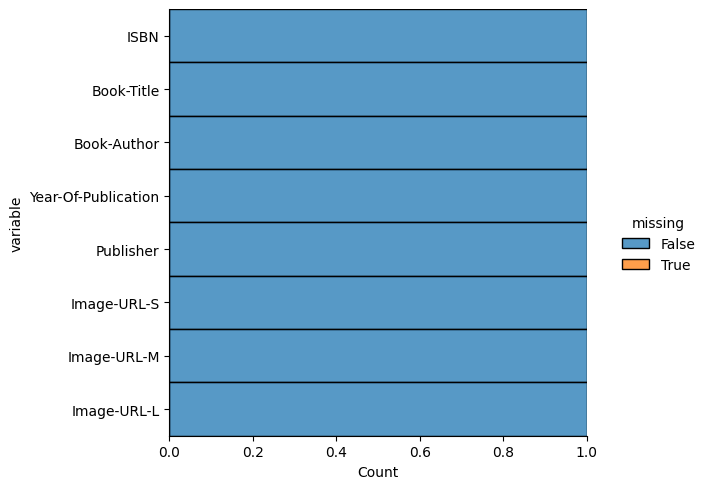

In [21]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_books.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

Since the missing values are very less as compared to total number of instances ,therefore we are not able visualie the missing values . The number of missing values are 1,2 and 3 and total insatnces is 271360 so the proportion is 0.000011 hence it is negligible

<Figure size 1000x600 with 0 Axes>

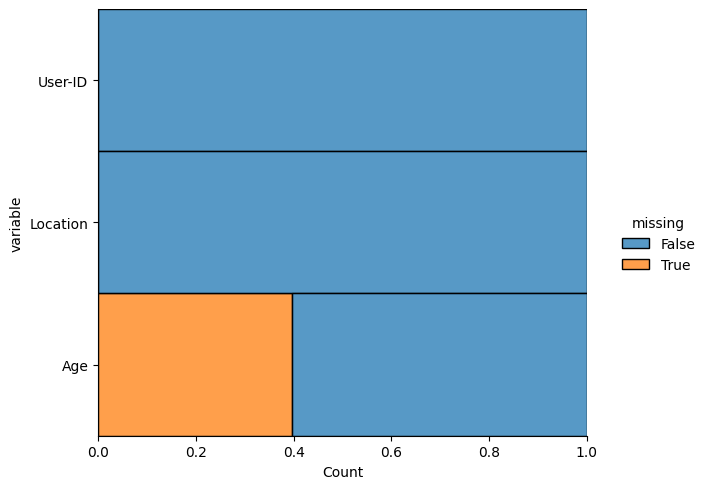

In [22]:
# Visualizing the missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_users.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

* For the users data we have about 0.4 proportion values of the Age column which is missing.

### What did you know about your dataset?

*  There 271360 rows and 8 columns in Books Dataset 

*  There are  1149780 rows and 3 columns in Rating Dataset

*  There are 278858 rows and 3 columns in Users Dataset

*  There are no duplicate values in any of the dataset for Books ,Ratings and Users

* There are very few (0.0011%) values which are missing for the columns Book_author , Publisher and Image_URL-L

## ***2. Understanding Your Variables***

In [23]:
# Dataset Columns
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [24]:
df_ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [25]:
df_users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [26]:
# Dataset Describe
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [27]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [28]:
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### Variables Description 

*  Books are identified by their respective **ISBN**. Moreover, some content-based information is given (**Book-Title, Book-Author, Year-Of-Publication, Publisher**) are obtained from Amazon Web Services. 

*  URLs linking to cover images are also given,It has basicaly three flovors of images (**Image-URL-S, Image-URL-M, Image-URL-L**), i.e., small, medium, large. These URLs point to the Amazon web site.

*  Users variables
   *  The average age of the users of books reader is 34-35 
*  Ratings variables
   *  The average rating given by the user is 2.8669 out of 10
   *  Range of rating is 0-10

*  Books variables
   *  There are total 102023 unique Authors listed in this dataset
   *  Top publisher which has largest number of books listed in this dataset is Harlequin
   *  There are 16807 unique publishers listed in this Dataset

### Check Unique Values for each variable.

In [29]:
# Check Unique Values for each variable.
df_books.nunique()

ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

In [30]:
df_ratings.nunique()

User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [31]:
df_users.nunique()

User-ID     278858
Location     57339
Age            165
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [32]:
# Write your code to make your dataset analysis ready.
# first we have to merge the datsets 
df_books_rating=df_books.merge(df_ratings,on="ISBN")
df_books_rating.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,0


*  **Checking the percentage of books which have  0 rating**

In [33]:
print(f'there are {(len(df_books_rating[df_books_rating["Book-Rating"]==0])/len(df_books_rating))*100} of the books which have 0 rating' )

there are 62.77484250380163 of the books which have 0 rating


*  **Droping some unnecessary columns and data**

In [34]:
df_books_rating_copy=df_books_rating.copy()
# removing null values
df_books_rating_copy.dropna(inplace=True)
df_books_rating_copy.reset_index(drop=True,inplace=True)


# as the columns ISBN has no use for the analysis also Year-Of-publication
# we can also remove the medium and small scale of a image link i.e Image-URL-S and Image-URL-M
df_books_rating_copy.drop(columns=["ISBN","Year-Of-Publication","Image-URL-S","Image-URL-M"],axis=1,inplace=True)

# we can also drop the book details where the ratings is 0 as it is not a valid rating
df_books_rating_copy.drop(index=df_books_rating_copy[df_books_rating_copy["Book-Rating"]==0].index,inplace=True)

df_books_rating_copy["Book-Title"]=df_books_rating_copy["Book-Title"].apply(lambda x: re.sub("[\W_]+"," ",x).strip())
df_books_rating_copy.head()

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating
1,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
3,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
5,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,67544,8
8,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,116866,9
9,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,123629,9


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

### **Top 20 author with number of books**

Text(0.5, 1.0, 'Top 20 author with number of books')

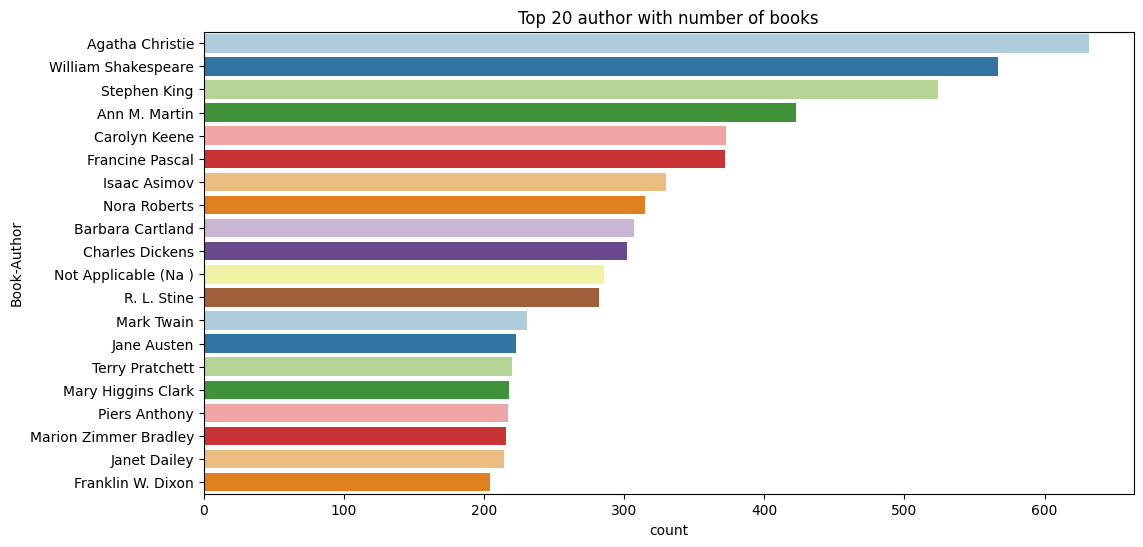

In [35]:

# Chart - 1 visualization code
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=df_books,order=df_books['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

##### 1. Why did you pick the specific chart?

*  To get the top 20 Author with number of Books


##### 2. What is/are the insight(s) found from the chart?

* Based on this dataset Agatha Christie released maximums books .Followed by William Shakespeare and Stephen King are 2nd and 3rd most Authors who have relased maximum books.

#### Chart - 2

Text(0.5, 1.0, 'Ratings')

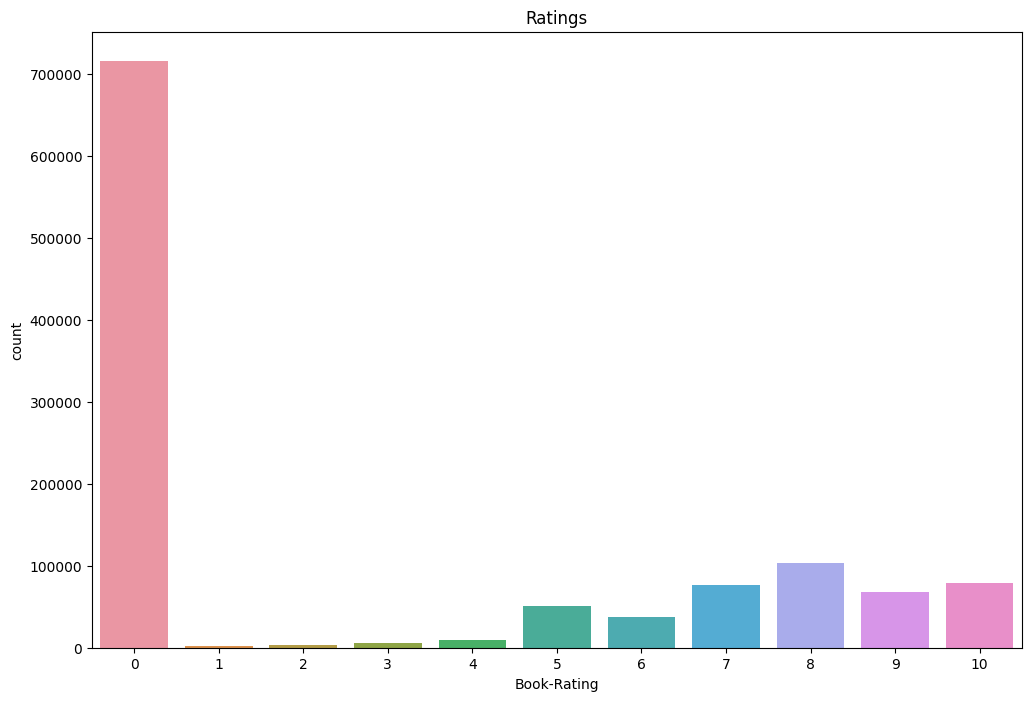

In [36]:
# Chart - 2 visualization code
# plotting the rating column distribusion
plt.figure(figsize=(12,8))
sns.countplot(x="Book-Rating", data=df_ratings)
plt.title("Ratings")

##### 1. Why did you pick the specific chart?

* To study the distribustion of Rating

##### 2. What is/are the insight(s) found from the chart?

*  Most of the books have 0 rating . As might be most of the books were not read , or not recorded its ratings . So during the time of dataset preparation they might have explicitly filled with zeros


* If we ignore this 0 ratings then 8 is the most common rating given by users out of 10

#### Chart - 3

### **Top 10 Books with highest nuumber of ratings**

In [37]:
# Chart - 3 visualization code
valid_rating=df_ratings[df_ratings['Book-Rating'] != 0]
top10_ratings=valid_rating.groupby('ISBN')['Book-Rating'].count().sort_values(ascending=False).head(10)
top10_ratings

ISBN
0316666343    707
0971880107    581
0385504209    487
0312195516    383
0679781587    333
0060928336    320
059035342X    313
0142001740    307
0446672211    295
044023722X    281
Name: Book-Rating, dtype: int64

#### Chart - 4

### **Users Age distribution**

Text(0.5, 1.0, 'Age Distribution Plot')

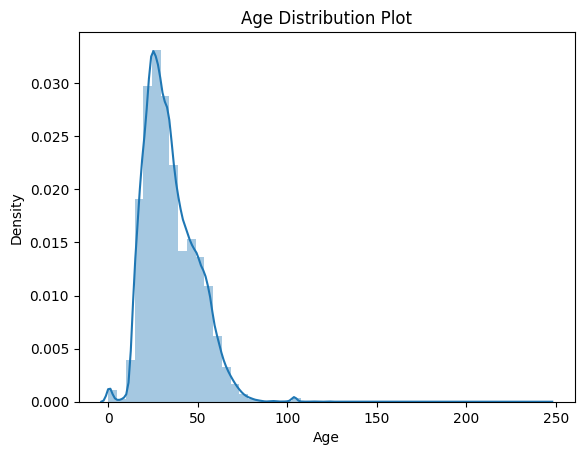

In [38]:
# Chart - 4 visualization code
# Checking data distribution from distplot
sns.distplot(df_users.Age)
plt.title('Age Distribution Plot')

##### 1. Why did you pick the specific chart?

* To study the distriution of Age

##### 2. What is/are the insight(s) found from the chart?

* Age is postively skewed it may contain outliers also we have some age as 0 , which might be explicity filled for the users who hadn't reported their age

#### Chart - 5

### **Checking Outliers for the Users Age column**

<Axes: xlabel='Age'>

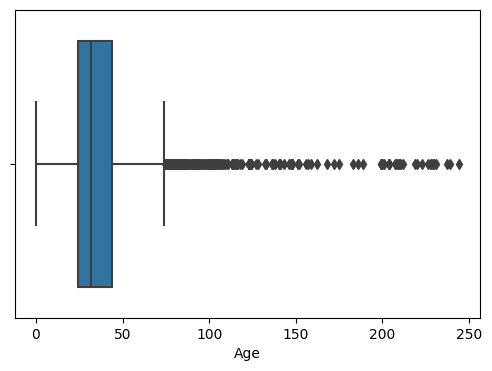

In [39]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=df_users)

##### 1. Why did you pick the specific chart?

* To check the outliers in the age column

##### 2. What is/are the insight(s) found from the chart?

* We can notice that there are some outliers for age column

#### Chart - 6

Text(0.5, 1.0, 'Top 20 author with maximum number of rating')

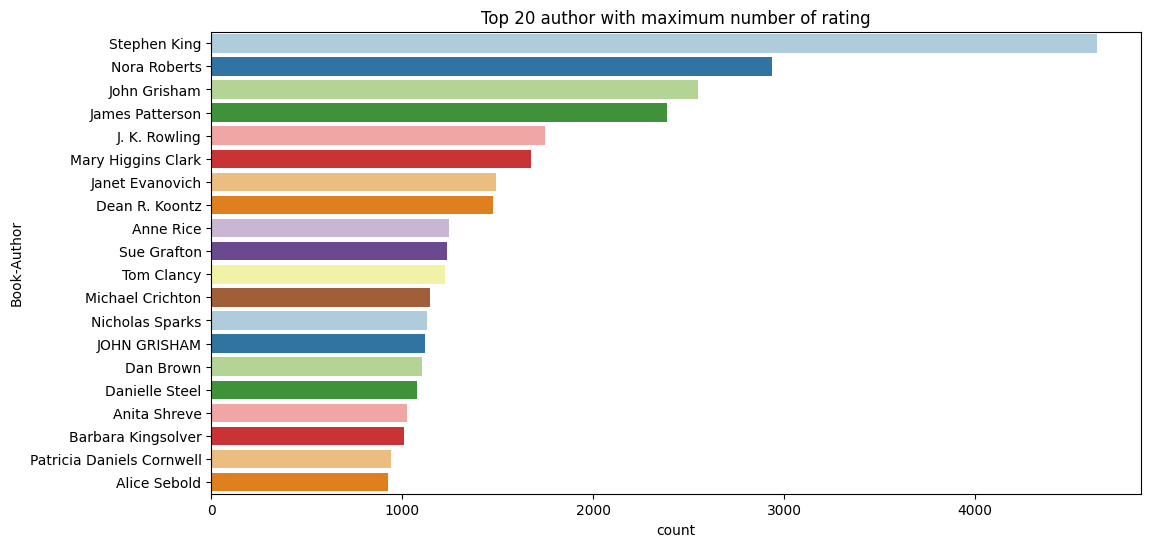

In [40]:
# Chart - 6 visualization code
plt.figure(figsize=(12,6))
sns.countplot(y="Book-Author",palette = 'Paired', data=df_books_rating_copy,order=df_books_rating_copy['Book-Author'].value_counts().index[0:20])
plt.title("Top 20 author with maximum number of rating")

##### 1. Why did you pick the specific chart?

* To study the Authors who got highest number of votes or ratings

##### 2. What is/are the insight(s) found from the chart?

* As per this dataset Stephen King is the Author who got maximum number of ratings by the users

#### Chart - 7

### **Top 10 books which got highest numbers of rating**

<Axes: xlabel='Book-Title'>

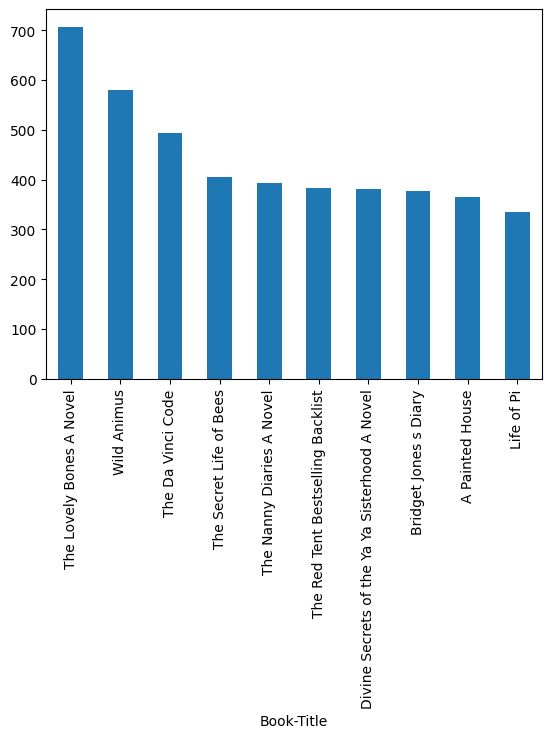

In [41]:
# Chart - 7 visualization code
df_books_rating_copy.groupby(['Book-Title'])['Book-Rating'].count().sort_values(ascending=False).head(10).plot(kind='bar')

##### 1. Why did you pick the specific chart?

* To study the highest rated Books

##### 2. What is/are the insight(s) found from the chart?

* Top-10 most rated books were essentially novels. Books like The Lovely Bone and Wild Animus were very famous

#### Chart - 8

### **Top 10 publishers with maximum number of ratings**

In [42]:
df_books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

Text(0.5, 1.0, "Top 10 'Publisher' with maximum number of rating")

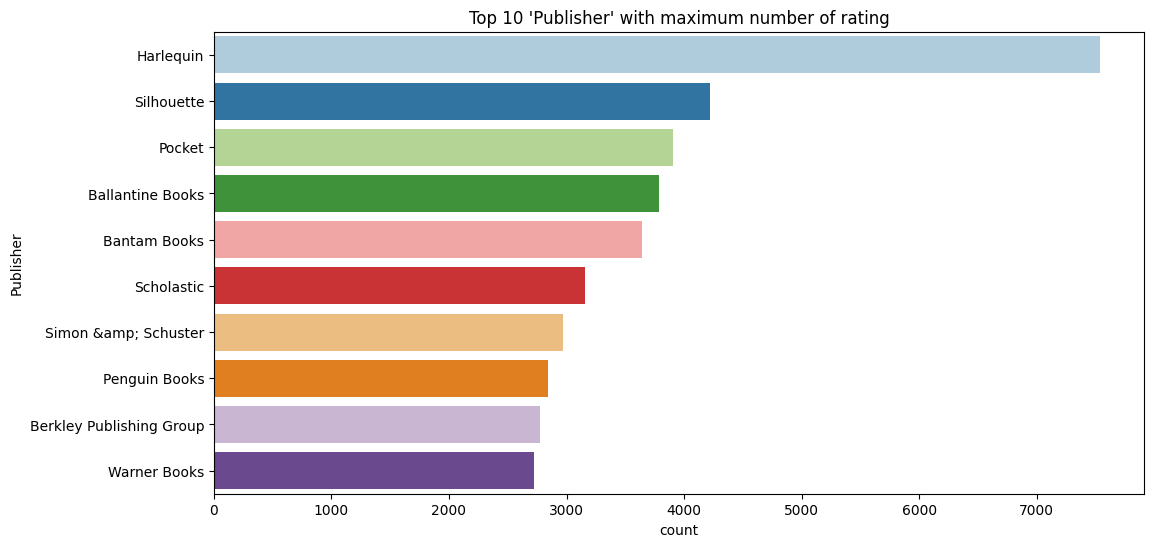

In [43]:
# Chart - 8 visualization code
plt.figure(figsize=(12,6))
sns.countplot(y='Publisher',palette = 'Paired', data=df_books,order=df_books['Publisher'].value_counts().index[0:10])
plt.title("Top 10 'Publisher' with maximum number of rating")

##### 1. Why did you pick the specific chart?

* To study the Publishers who have got most ratings

##### 2. What is/are the insight(s) found from the chart?

* Most of the books were  pulblised by Hariequin, Silhouette and Pocket

### 1. Handling Missing Values

In [44]:
# Handling Missing Values & Missing Value Imputation
# filling null values of the age column of users data
# as age contains outliers so we can use median
df_users["Age"].fillna(df_users.Age.median(),inplace=True)

In [45]:
# checking the unique values of year of publication
df_books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

* There are values such as 'DK Publishing Inc' and 'Gallimard' which are in text form 

* There are values such as 0 for the year-of-publication column







In [46]:
# checking the data where the 'Year-Of-Publication' is 'DK Publishing Inc'
df_books.loc[df_books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


* We can notice that the Book-Author ,Year-of-Publication , Book-Author and Publisher columns are exchanged with each others and publication column contain image links

* we need to find the Book-Author on our own for the book DK Readers: Creating the X-Men, How It All Beg.. and DK Readers: Creating the X-Men, How Comic Book..

In [47]:
#Fixing the wrongly inputed values 
#ISBN '0789466953'
df_books.loc[df_books.ISBN == '0789466953','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '0789466953','Book-Author'] = "James Buckley" # this we gathered from the google 
df_books.loc[df_books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
df_books.loc[df_books.ISBN == '078946697X','Year-Of-Publication'] = 2000
df_books.loc[df_books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum" # this we gathered from the google
df_books.loc[df_books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
df_books.loc[df_books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"


In [48]:
# checking for the Gallimard
df_books.loc[df_books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


* Here also we can see that Book-Author, year-of-publication and publishers values are interchnaged and publishers actual name is missing

In [49]:
df_books.loc[df_books.ISBN == '2070426769','Year-Of-Publication'] = 2003
df_books.loc[df_books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
df_books.loc[df_books.ISBN == '2070426769','Publisher'] = "Gallimard"
df_books.loc[df_books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [50]:
# Rechecking the correction made
df_books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [51]:
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype(int)
# Replacing invalid values such as year greateer than 2022 and year having 0 with the NaN
# so that we can fill those null values with proper measure of centreal tendency

df_books.loc[(df_books['Year-Of-Publication'] > 2022) | (df_books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

# filling the null values with median values as there are outliers in year-of-publication column
df_books['Year-Of-Publication'].fillna(round(df_books['Year-Of-Publication'].median()),inplace=True)

In [52]:
# filling null values for the column Book-Author and Publisher
# as we have only very few null values  1 and 2 only so we acn fill those values with other 
df_books["Book-Author"].fillna("other", inplace = True)  
df_books["Publisher"].fillna("other", inplace = True)  

#### What all missing value imputation techniques have you used and why did you use those techniques?

* Filling the values with median when the column contain outilers 

### 2. Handling Outliers

In [53]:
# Handling Outliers & Outlier treatments
Q3,Q1 = np.percentile(df_users['Age'],[75,25])
#Calculating Inter Quartile Range
IQR = Q3-Q1
#Fixing Boundaries for outliers
max = Q3+(1.5*IQR)
min = Q1-(1.5*IQR)
df_users["Age"] = np.where(df_users["Age"] > max, max, df_users['Age'])
df_users["Age"] = np.where(df_users["Age"] < min, min, df_users['Age'])

<Axes: xlabel='Age'>

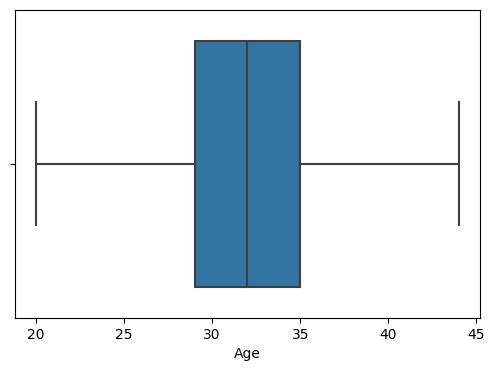

In [54]:
# chceking the outliers again
fig = plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=df_users)

* We can notice that the Outliers has been handeled smoothly and now we dont have any outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

* We used IQR method to fill the right side otliers with maximum value calculated from IQR and Left side outliers with the minimum value calculated from IQR

## **Popularity Based Approach**

* The main idea behind Popularity Based Approach is to recomend the books which are popular , the popularity can be calculated on the basis of ratings 

In [55]:
def popularity_approach(df,number_of_top_book=50):
    # first we have groupy with Book-Ttle and Book-rating as we wou recomend popularity on the these columns  
    rating_counts=df.groupby("Book-Title").count()["Book-Rating"].reset_index()
    # counting the number of ratings that particular book-title has got
    rating_counts.rename(columns={"Book-Rating":"num_of_ratings"},inplace=True)
    
    # calculating average rating
    rating_avg=df.groupby("Book-Title")["Book-Rating"].mean().reset_index()
    rating_avg.rename(columns={"Book-Rating":"average_rating"},inplace=True)
    
    df_popular_books=rating_counts.merge(rating_avg,on="Book-Title")

    # average rating can be misguiding as they may be baised to number of ratings
    # so taking account of number of ratings for particular book-title
    # therefore  creating a function for calculating meaningfull average rating
    mean_avg_rating=df_popular_books["average_rating"].mean()
    total_ratings=df_popular_books["num_of_ratings"].quantile(0.90)
    def weighted_rate(df):
        number_of_rating_vector=df["num_of_ratings"]
        average_rating_vector=df["average_rating"]
        
        return ((number_of_rating_vector*average_rating_vector) + (total_ratings*mean_avg_rating)) / (number_of_rating_vector+total_ratings)
    
    
    # checking only for books which got more than 
    df_popular_books=df_popular_books[df_popular_books["num_of_ratings"] >=100]
    # calculating popularity of books using weighted_rate
    df_popular_books["popularity"]=df_popular_books.apply(weighted_rate,axis=1)
    # sorting the books by its popularity in decending order
    df_popular_books=df_popular_books.sort_values(by="popularity",ascending=False)
    # returning the top n books 
    return df_popular_books[["Book-Title","num_of_ratings","average_rating","popularity"]].reset_index(drop=True).head(number_of_top_book)

In [56]:
# top 20 popular books
top_20=pd.DataFrame(popularity_approach(df_books_rating_copy,20))
top_20

,Book-Title,num_of_ratings,average_rating,popularity
0,The Two Towers The Lord of the Rings Part 2,136,9.330882,9.266739
1,The Return of the King The Lord of the Rings P...,105,9.228571,9.151002
2,Harry Potter and the Goblet of Fire Book 4,247,9.125506,9.093691
3,Harry Potter and the Sorcerer s Stone Book 1,176,9.062500,9.019946
4,Harry Potter and the Prisoner of Azkaban Book 3,277,9.043321,9.016348
5,Harry Potter and the Order of the Phoenix Book 5,211,9.047393,9.012084
6,To Kill a Mockingbird,267,8.977528,8.950773
7,Harry Potter and the Sorcerer s Stone Harry Po...,315,8.936508,8.914407
8,Ender s Game Ender Wiggins Saga Paperback,151,8.920530,8.875707
9,The Fellowship of the Ring The Lord of the Rin...,205,8.882927,8.850525


## **Collaborative Filtering Approaches**

In Collaborative Filtering we make predictions of the taste or the intrests of the user based based on the other similar users behaviour (which is called collaborative) .The simple understanding is that if a person P1 have similar opinion with person P2 , then if person P1 is reading Harry Potter books then person P2 may also read Harry Potter books

Collaborative Filtering has mainly two implimentaion strategies
*   Model Based
*   Memory Based

we will use following approaches
*  User_based Collaborative Filtering and 
*  Item_based Collaborative Filtering

* Content Based Filtering


*  Model based Collaborative Filtering Approach
  * Singular value decomposition(SVD)
  * Non-Negetive Matrix Factorisation(NMF)

### **User Based Collaborative Filtering**

*  In this technique we try to predict on basis of what user may like based on the ratings that they had given to the items. In simpe words here we try to indentify the neghbouring users on the basis of similarity of active users and then scoring of the items  is calculated on the basis of those neighbour users

In [57]:
# Drop users who have given less number of votings 
# we will drop the users where the number of votes are less than 100
new_df=df_books_rating_copy[df_books_rating_copy['User-ID'].map(df_books_rating_copy['User-ID'].value_counts()) > 100] 

# creating a pivot tables consisting user realted information
users_info=new_df.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
users_info.fillna(0,inplace=True)


In [58]:
users_info.head(3)

Book-Title,01 01 00 A Novel of the Millennium,01 01 00 The Novel of the Millennium,1 000 Makers of the Millennium The Men and Women Who Have Shaped the Last 1 000 Years,1 000 Places to See Before You Die,1 000 Years 1 000 People Ranking the Men and Women Who Shaped the Millennium,1 001 Health Tips,1 001 Old Time Garden Tips Timeless Bits of Wisdom on How to Grow Everything Organically from the Good Old Days When Everyone Did,1 003 Great Things About Kids,1 2 3 Magic Effective Discipline for Children 2 12,1 2 3 Music,...,the Devil Will Drag You Under,them Modern Library,together by christmas,wet sand raven tracks,whataboutrick com a poetic tribute to Richard A Ricci,y los 40 ladrones ColecciÃ³n FÃ bula,Â Corre perro corre,Â Eres tu mi mamÃ Are You My Mother,Ã ngeles fugaces Falling Angels,Ã Â ber das Fernsehen
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
def choice_of_users(id):
    
    user_favourite=new_df[new_df["User-ID"]==id].sort_values(["Book-Rating"],ascending=False)[0:10]
    return user_favourite

def user_based_collaborative(new_df,user_id):
    if user_id not in new_df["User-ID"].values:
        print("USER NOT FOUND")
        
        
    else:
        user_index=np.where(users_info.index==user_id)[0][0]
        similar=cosine_similarity(users_info)
        similar_users_list=list(enumerate(similar[user_index]))
        similar_users_list = sorted(similar_users_list,key = lambda x:x[1],reverse=True)[0:10]
    
        record_of_users=[]
    
        for ind in similar_users_list:
                data=df_books_rating_copy[df_books_rating_copy["User-ID"]==users_info.index[ind[0]]]
                record_of_users.extend(list(data.drop_duplicates("User-ID")["User-ID"].values))
        
    return record_of_users

def common(df,users_list,user_id):
    temp1=new_df[df["User-ID"]==user_id]
    suggested_books=[]
    users_list=list(users_list)
    for id in users_list:
        temp2=df[(df["User-ID"]==id)]
        all_books=temp2.loc[~temp2["Book-Title"].isin(temp1["Book-Title"]),:]
        all_books=all_books.sort_values(["Book-Rating"],ascending=False)[0:10]
        suggested_books.extend(all_books["Book-Title"].values)
        
    return suggested_books[0:10]





In [60]:
# taking any random user_id
random_user_id=random.choice(new_df["User-ID"].values)
# showing users choice based on history
user_choice=pd.DataFrame(choice_of_users(random_user_id))
# subseting users favourite from users choice
user_favorite=choice_of_users(random_user_id)
n=len(user_choice["Book-Title"].values)
print(f"USER: {random_user_id} ")

USER: 274061 


In [61]:
user_favorite

,Book-Title,Book-Author,Publisher,Image-URL-L,User-ID,Book-Rating
10758,The Girl Who Loved Tom Gordon,Stephen King,Pocket,http://images.amazon.com/images/P/0671042858.0...,274061,10
626638,Feast of Fear Conversations With Stephen King,Tim Underwood,Pub Group West,http://images.amazon.com/images/P/0881848115.0...,274061,10
580148,Unicorn Mountain Spectra,Michael Bishop,Spectra Books,http://images.amazon.com/images/P/0553279041.0...,274061,10
585103,The Unlikely Ones,Mary Brown,McGraw-Hill,http://images.amazon.com/images/P/0070082960.0...,274061,10
590900,Outlaw Silhouette Desire No 624,Elizabeth Lowell,Silhouette,http://images.amazon.com/images/P/0373056249.0...,274061,10
604629,Dare to Go A Hunting,Andre Norton,Tor Books (Mm),http://images.amazon.com/images/P/0812547128.0...,274061,10
608610,Tell Me No Lies,Elizabeth Lowell,Mira,http://images.amazon.com/images/P/1551660962.0...,274061,10
617256,Wild Hearts Avon Romance,Virginia Henley,Avon,http://images.amazon.com/images/P/0380895366.0...,274061,10
618926,Only You,Elizabeth Lowell,Avon,http://images.amazon.com/images/P/0380763400.0...,274061,10
623451,To the Ends of the Earth Avon Romance,Elizabeth Lowell,Avon,http://images.amazon.com/images/P/0380767589.0...,274061,10


In [62]:
# getting user based data for particular random user id
user_based=user_based_collaborative(new_df,random_user_id)
# getting recomended books for that particular random user id
book_suggesions_user=common(new_df,user_based,random_user_id)
# ceating a dataframe to store the results
book_suggesions_user=pd.DataFrame(book_suggesions_user,columns=["Book-Title"])
book_suggesions_user

,Book-Title
0,Blackwood Farm The Vampire Chronicles
1,The Stand Complete and Uncut
2,Brave New World
3,Silence of the Lambs
4,The Bourne Identity
5,1984 Everyman s Library
6,Intensity
7,Wolves of the Calla The Dark Tower Book 5
8,Artemis Fowl The Arctic Incident Book 2 Artemi...
9,Interview with the Vampire


### **Item Based Collaborative Filtering**

*  In Item based collaborative filtering we try to find similar items based on the items whichs user has liked or interacted with .It suggests an item based on items the user has previously consumed. It looks for the items the user has consumed then it finds other items similar to consumed items and recommends accordingly

In [63]:
def item_based_approach(data,querry_bookTitle,number_of_suggesions):
    querry_bookTitle=str(querry_bookTitle)
    
    if querry_bookTitle in data["Book-Title"].values:
        count_rating=pd.DataFrame(data["Book-Title"].value_counts())
        # seperating rare books
        rare=count_rating[count_rating["Book-Title"]<=100].index
        # defining common books 
        # as those books which are not rare are common books
        common_b=data[~data["Book-Title"].isin(rare)]
        
        # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books 
            ran5=pd.Series(common_b["Book-Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            common_b_pivot=common_b.pivot_table(index=["User-ID"],columns=["Book-Title"],values="Book-Rating")
            # defining book-title as t
            t=common_b_pivot[querry_bookTitle]
            # making suggesions based on the correlation
            suggesion_df=pd.DataFrame(common_b_pivot.corrwith(t).sort_values(ascending=False)).reset_index(drop=False)
            
            if querry_bookTitle in [ele for ele in suggesion_df["Book-Title"]]:
                suggesion_df=suggesion_df.drop(suggesion_df[suggesion_df["Book-Title"]==querry_bookTitle].index[0])
                
            less_rating=[]
            for ele in suggesion_df["Book-Title"]:
                if data[data["Book-Title"]==ele]["Book-Rating"].mean() < 5:
                    less_rating.append(ele)
            if suggesion_df.shape[0] - len(less_rating) > 5:
                suggesion_df=suggesion_df[~suggesion_df["Book-Title"].isin(less_rating)]
                
            suggesion_df=suggesion_df[0:number_of_suggesions]
            suggesion_df.columns=["Book-Title","Correlation"]

            return suggesion_df
            
    else:
        print("No Results Found  !!!")

In [64]:
# getting top 10 suggesions from item-based approach
item_based_approach(df_books_rating_copy,"The Da Vinci Code",10)

,Book-Title,Correlation
1,Silence of the Lambs,1.000000
2,Dance upon the Air Three Sisters Island Trilogy,1.000000
3,Unnatural Exposure,0.946118
4,The Divine Secrets of the Ya Ya Sisterhood A N...,0.943242
5,The Smoke Jumper,0.896258
6,Four Blind Mice,0.887437
7,Back Roads,0.883452
8,Girl Interrupted,0.877346
9,The Hitchhiker s Guide to the Galaxy,0.857690
10,Pop Goes the Weasel,0.850640


In [65]:
# when the book title is not present
item_based_approach(df_books_rating_copy,"machine learning",10)

No Results Found  !!!


## **Content based**

In Content based Filtering approach we recomend item to the users based on the content we have about the history of users. We recomend similar books  based what other books that particular user has read.In simple words based on what we like ,the algorithm will simply pick the items with similar content to recomend us.


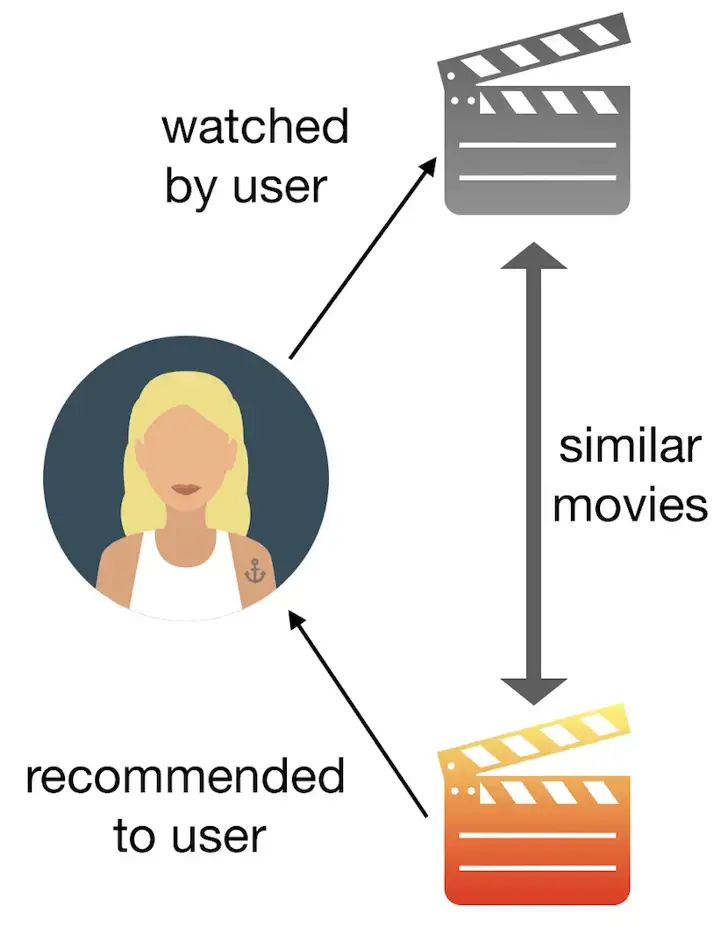

source:[click here](https://miro.medium.com/max/720/1*BME1JjIlBEAI9BV5pOO5Mg.webp)

In [66]:
def content_based_approach(data,querry_bookTitle,number_of_books):
    querry_bookTitle=str(querry_bookTitle)
    
    if querry_bookTitle in data["Book-Title"].values:
        count_rating=pd.DataFrame(data["Book-Title"].value_counts())
        # seperating rare books
        rare=count_rating[count_rating["Book-Title"]<=100].index
        # defining common books 
        # as those books which are not rare are common books
        common_b=data[~data["Book-Title"].isin(rare)]
        
        # If the qerry book title is very rare then we would suggest the most common books
        if querry_bookTitle in rare:
            # storing most common books 
            ran5=pd.Series(common_b["Book-Title"].unique()).sample(5).values
            print("No hard recomendation for this book can be suggested")
            print("but you can try with most common books ")
            # suggesting randomly 5 books from set of common books
            print(f"1st {ran5[0]}")
            print(f"2nd {ran5[1]}")
            print(f"3rd {ran5[2]}")
            print(f"4th {ran5[3]}")
            print(f"5th {ran5[4]}")
        else:
            #first we drop the dulplicates Book Title
            common_b=common_b.drop_duplicates(subset=["Book-Title"])
            common_b.reset_index(inplace=True)
            # setting the index to length of unique common books
            common_b["index"]=[ele for ele in range(common_b.shape[0])]
            # taking content based book-title , book-Author and publisher
            list_of_targets=["Book-Title","Book-Author","Publisher"]
            common_b["all_features"] = [" ".join(common_b[list_of_targets].iloc[ele,].values) for ele in range(common_b[list_of_targets].shape[0])]
            # transfforming into vectorized form
            vectorizer=CountVectorizer()
            common_booksVector=vectorizer.fit_transform(common_b["all_features"])
            # finding similarity based on book-title , book-Author and publisher
            similar=cosine_similarity(common_booksVector)
            index=common_b[common_b["Book-Title"]==querry_bookTitle]["index"].values[0]
            similar_books_list=list(enumerate(similar[index]))
            similar_books_sorted=sorted(similar_books_list,key=lambda ele:ele[1],reverse=True)[1:number_of_books+1]
            suggested_books=[]
            for ele in range(len(similar_books_sorted)):
                
                suggested_books.append(common_b[common_b["index"]==similar_books_sorted[ele][0]]["Book-Title"].item())
            return suggested_books
    else:
        print(" COULD NOT FIND THE CONTENT") 

In [67]:
content_based_approach(df_books_rating_copy,'The Da Vinci Code',10)

['The Catcher in the Rye',
 'The Brethren',
 'The Firm',
 'The Client',
 'The Chamber',
 'The Partner',
 'The Hobbit The Enchanting Prelude to The Lord of the Rings',
 'Angels amp Demons',
 'The Fellowship of the Ring The Lord of the Rings Part 1',
 'The Return of the King The Lord of the Rings Part 3']

## ***7. Model Based Approach***

**Singular Value Decomposition (SVD)**, is a popular method in field of Data Science and Machine Learning .It is a classical method from the Linear Algebra concept. It is popular beacuse of its properties and its use in Recomendation System. We can use this in recomending Books, movies etc.

SVD is a method from linear algebra that has been generally used as a dimensionality reduction technique in ML problems. It is a matrix Factorisation technique which tries to reduce the number of feature or attributes by reducing the sapce dimension from N dimension to I dimension.SVD is used as a collaborative filtering technique in recomendation technique domain. It consist of a matrix structure where the rows define the users and columns defines the item.


**Non- Negetive Matrix Factorisation(NMF) :** Our goal in NMF is to approximate the users-item V matrix by the dot product of two arrays W and H. Dimensions of the arrays are defined by dimensions of V and number of components we set to the algorithm. If V has n rows and m columns and we want to decompose it to k components, then W has n rows, and k columns and H has k rows and m columns.This is actually matrix factorization part of the algorithm. The Non-negative part refers to V, W, and H — all the values have to be equal or greater than zero, i.e., non-negative.

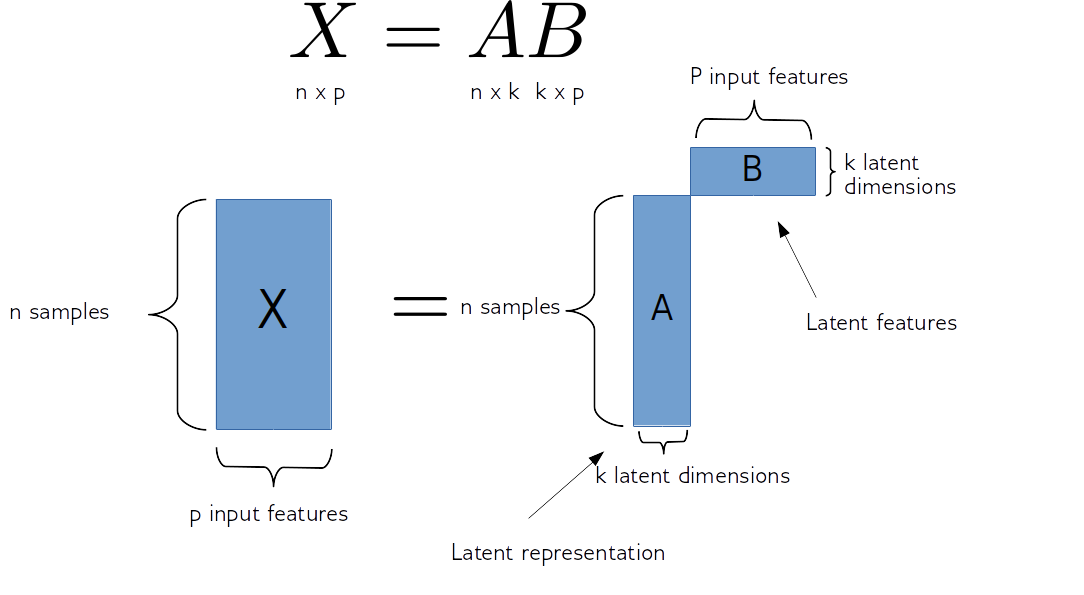


Source:[Click here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fpredictivehacks.com%2Fnon-negative-matrix-factorization-for-dimensionality-reduction%2F&psig=AOvVaw1hRiKieTP6oX2TMPPRoxiz&ust=1671441917992000&source=images&cd=vfe&ved=0CBAQjRxqFwoTCLDK4cDsgvwCFQAAAAAdAAAAABAE)

### ML Model - 1

In [68]:
# cosidering valid ratings only
df_ratings=df_ratings[df_ratings['Book-Rating'] != 0]
df_merge=pd.merge(df_users, df_ratings, on="User-ID")
df_merge=pd.merge(df_merge,df_books, on="ISBN")

In [69]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383842 non-null  int64  
 1   Location             383842 non-null  object 
 2   Age                  383842 non-null  float64
 3   ISBN                 383842 non-null  object 
 4   Book-Rating          383842 non-null  int64  
 5   Book-Title           383842 non-null  object 
 6   Book-Author          383842 non-null  object 
 7   Year-Of-Publication  383842 non-null  float64
 8   Publisher            383842 non-null  object 
 9   Image-URL-S          383842 non-null  object 
 10  Image-URL-M          383842 non-null  object 
 11  Image-URL-L          383841 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 38.1+ MB


In [70]:
df_merge.drop(['Image-URL-M','Image-URL-S','Image-URL-L'],axis=1,inplace=True)

In [71]:
df_merge.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

In [72]:
# ML Model - 1 Implementation
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_merge[['User-ID', 'ISBN', 'Book-Rating']], reader)
# Fit the Algorithm
svd_default = SVD()
results_svd = cross_validate(svd_default, data, cv=3)
pd.DataFrame(results_svd).mean()
# Predict on the model

test_rmse    1.641877
test_mae     1.268730
fit_time     4.777002
test_time    1.277067
dtype: float64

In [73]:
#implimentation of NMF
nmf = NMF()
results_nmf = cross_validate(nmf, data, cv=3)
pd.DataFrame(results_nmf).mean()

test_rmse     2.462510
test_mae      2.045431
fit_time     17.645235
test_time     1.012812
dtype: float64

#### 2. Cross- Validation & Hyperparameter Tuning

* **As SVD model is working good with deafault parameters so, we would try hypertunning on SVD model only**

Hyperparameter tunning is a process where we tune our model that is we try to find the odel parameters which would give best results 
* Here we have use GridSearchCV which check the results for all possible combination from the parameter grid

* we will try to find the model parameters 
            'n_factors'- number of factors
            'n_epochs'- number of epochs i.e number of iteration of the SVD procedure 
            'lr_all'- learning rate
            'reg_all- the regularisation term for all parameters

In [74]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_factors': [60,50],
              'n_epochs': [6, 16],
              'lr_all': [0.01, 0.001],
              'reg_all': [0.1, 0.9]}

opt_svd = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
opt_svd.fit(data)

print(opt_svd.best_score['rmse'])
print(opt_svd.best_params['rmse'])

1.632881982343161
{'n_factors': 50, 'n_epochs': 16, 'lr_all': 0.01, 'reg_all': 0.1}


**Hypertunning SVD model**

In [75]:
# Spliting the dataset in train teat and predict
train, test = train_test_split(data, test_size=0.2)
best_params=opt_svd.best_params['rmse']
optimized_svd = SVD(n_factors=best_params['n_factors'], n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
optimized_svd.fit(train)
pred = optimized_svd.test(test)

In [76]:
results_svd = cross_validate(optimized_svd, data, cv=3)
pd.DataFrame(results_svd).mean()

test_rmse    1.634429
test_mae     1.266466
fit_time     3.092748
test_time    0.851964
dtype: float64

In [77]:
# To see predictions
df_pred = pd.DataFrame(pred, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)
df_pred.sample(10)

,user_id,isbn,actual_rating,pred_rating,impossible,pred_rating_round,abs_err
25304,142143,0698115554,10.0,8.868353,False,9.0,1.131647
61934,253821,0425162028,10.0,6.951643,False,7.0,3.048357
63447,121928,1573222631,9.0,7.910940,False,8.0,1.089060
58836,11676,0152014667,10.0,7.327499,False,7.0,2.672501
69717,104243,0425147622,6.0,7.097406,False,7.0,1.097406
48542,89602,1841954608,8.0,7.040600,False,7.0,0.959400
69741,100906,0811818853,8.0,7.998166,False,8.0,0.001834
13444,37950,0451177096,8.0,7.420848,False,7.0,0.579152
9372,70052,0380773155,7.0,6.859169,False,7.0,0.140831
18167,59269,0060256672,10.0,10.000000,False,10.0,0.000000


##### Which hyperparameter optimization technique have you used and why?

*  GridSearchCV , As we have to check results for all possible combination of parameters from the param grid

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* yes , the test_rmse has been reduced by 0.01

# **Conclusion**

**For EDA part** 
* Top-10 most rated books were essentially novels. Books like The Lovely Bone and Wild Animus were very famous 

* Most of the books were  pulblised by Hariequin, Silhouette and Pocket

* As per this dataset Stephen King is the Author who got maximum number of ratings by the users

* Based on this dataset Agatha Christie released maximums books .Followed by William Shakespeare and Stephen King are 2nd and 3rd most Authors who have relased maximum books.
* Most commom rating given by the user is 8

**Modelling part**

* SVD model works better than NMF model as it has lower RMSE and MAE score.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***